In [228]:
#Random Forest Regression
'''
The purpose of this program is to show how Random Forest Regressor works to predict the Dependent Variable. 
Accuracy would be bad as data preprocessing is not applied. 
'''

#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
#Loading the Dataset
loadDataset = pd.read_csv("Downloads/insurance1.csv")
loadDataset.head()
loadDataset.dtypes

age           int64
expenses    float64
dtype: object

In [230]:
# Parting into Train and Test Dataset
X = loadDataset.iloc[:, :-1].values
y = loadDataset.iloc[:, 1].values
print(y.shape)
print(X.shape)
print(y)

(1338,)
(1338, 1)
[16884.92  1725.55  4449.46 ...  1629.83  2007.95 29141.36]


In [231]:
#Generating Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 1)
(1070,)
(268, 1)
(268,)


In [232]:
#Creating Random Forest Model
from sklearn.ensemble import RandomForestRegressor
#randomForestModel = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)
randomForestModel = RandomForestRegressor(n_estimators = 500, random_state = 0)
randomForestModel.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [233]:
#Predicting on the Test Data
randomForestModelPrediction = randomForestModel.predict(X_test)
randomForestModelPrediction

array([19435.57101756, 16833.95007042, 13726.12192115, 21803.02147947,
       15425.16937918, 11158.14598085,  7063.17255955, 15425.16937918,
        8706.5583643 ,  9929.95534757, 11158.14598085, 15764.8895205 ,
       18900.45030764, 13183.90880442, 13396.19834332, 15764.8895205 ,
       20966.1094886 ,  6862.78379426,  8706.5583643 ,  8730.7698585 ,
       15425.16937918, 16008.04145686, 19435.57101756, 16833.95007042,
       11589.97792037,  9669.6941521 ,  8636.23391874, 11175.50902801,
        9929.95534757, 15848.29311468, 11175.50902801, 17548.41215431,
       16500.77982707, 15482.98982775, 10341.9437963 , 11401.76733153,
       15506.27813912,  8636.23391874, 11175.50902801,  8730.7698585 ,
       12296.99598046, 11567.26780676, 11815.05538538, 11981.71650163,
        7063.17255955,  4185.93783443, 15764.8895205 , 12048.2320887 ,
       11401.76733153, 14910.28912828, 13796.61850657,  9666.19498811,
       13726.12192115, 15425.16937918, 11981.71650163,  8636.23391874,
      

In [234]:
# Calculate the absolute errors
errors = abs(randomForestModelPrediction - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 9054.84 degrees.


In [235]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -11.98 %.


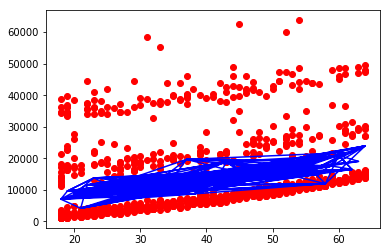

In [244]:
#Plotting the Performance
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_test, randomForestModel.predict(X_test), color = 'blue')

#plt.plot(X_train, randomForestModel.predict(X_train.reshape(-1,1)), color = 'blue')
#plt.plot(_train, randomForestModel.predict(X_train),color = 'green')
plt.show()